Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

# Load packages

In [24]:
import pandas as pd
import numpy as np

import os
print(os.listdir("data"))

# plot
import seaborn as sns
import matplotlib.pyplot as plt

# stat
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


# Load data

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print("Data loaded!")

Data loaded!


In [4]:
print("Train set sales #:", train.shape[0], ", Train set features #:", train.shape[1])
print("Test set sales #:", test.shape[0], ", Test set features #:", test.shape[1])

Train set sales #: 1460 , Train set features #: 81
Test set sales #: 1459 , Test set features #: 80


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# EDA (Exploratory Data Analysis)

In [7]:
quantitative = [x for x in train.columns if train.dtypes[x] != 'object']

In [8]:
# train.dtypes
# train.columns
print(train.dtypes)
print("train.dtypes['Street']:", train.dtypes['Street'])
print("train.dtypes['Street'] is not object:", train.dtypes['Street'] != 'object')
print("train.dtypes['Id'] is not object:", train.dtypes['Id'] != 'object')

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
train.dtypes['Street']: object
train.dtypes['Street'] is not object: False
train.dtypes['Id'] is not object: True


In [9]:
train.dtypes['Street'] # dtype('O')
train.dtypes['Id'] # dtype('int64')

dtype('int64')

**Comment**: `dtype('O')` means _object_  instead of zero.


In [10]:
quantitative = [x for x in train.columns if train.dtypes[x] != 'object']
qualitative = [x for x in train.columns if train.dtypes[x] == 'object']

In [11]:
# quantitative
quantitative.remove('Id')
quantitative.remove('SalePrice')
quantitative

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [12]:
qualitative

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
missing = train.isnull().sum()
missing = missing[missing>0]
print(type(missing))
print(missing.index)

<class 'pandas.core.series.Series'>
Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


<AxesSubplot:>

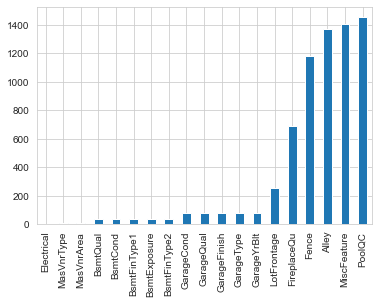

In [14]:
# Check missing values distribution

#sns.set_style()
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

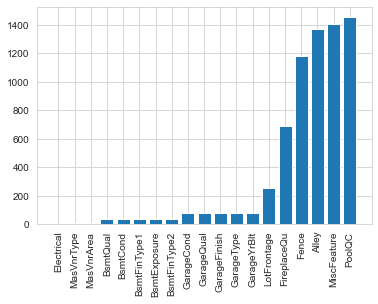

In [15]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(missing.index, missing)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

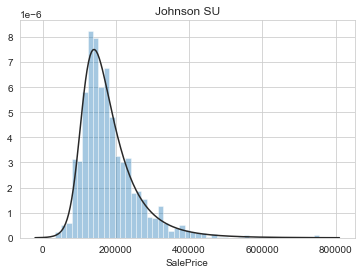

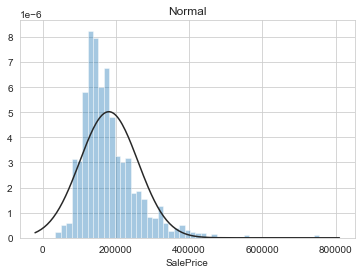

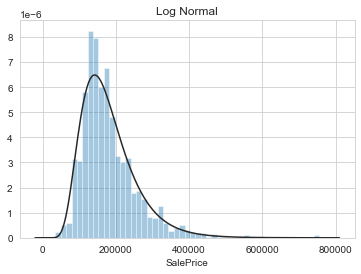

In [25]:
# import seaborn as sns

y = train['SalePrice']
plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)


In [28]:
train

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool

In [26]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01 # stats.shapiro()[1] is p-value
normal = pd.DataFrame(train[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


**Comment**

> scipy.stats.shapiro(x)[source]
>
> Perform the Shapiro-Wilk test for normality.
>
> The Shapiro-Wilk test tests **the null hypothesis that the data was drawn from a normal distribution**.
>
> It returns: 0) the test statistic; 1) p-value

`stats.shapiro()[1]` is p-value
